In [66]:
import numpy as np 
import pandas as pd
import os


In [67]:
for dirname, _, filenames in os.walk(r"D:\IMARTICUS\Python\ML_EXAM\WBeyond_Internship\store_forecasting_data"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\IMARTICUS\Python\ML_EXAM\WBeyond_Internship\store_forecasting_data\.~lock.holidays_events.csv#
D:\IMARTICUS\Python\ML_EXAM\WBeyond_Internship\store_forecasting_data\.~lock.oil.csv#
D:\IMARTICUS\Python\ML_EXAM\WBeyond_Internship\store_forecasting_data\.~lock.sample_submission.csv#
D:\IMARTICUS\Python\ML_EXAM\WBeyond_Internship\store_forecasting_data\.~lock.stores.csv#
D:\IMARTICUS\Python\ML_EXAM\WBeyond_Internship\store_forecasting_data\.~lock.train.csv#
D:\IMARTICUS\Python\ML_EXAM\WBeyond_Internship\store_forecasting_data\.~lock.transactions.csv#
D:\IMARTICUS\Python\ML_EXAM\WBeyond_Internship\store_forecasting_data\holidays_events.csv
D:\IMARTICUS\Python\ML_EXAM\WBeyond_Internship\store_forecasting_data\oil.csv
D:\IMARTICUS\Python\ML_EXAM\WBeyond_Internship\store_forecasting_data\sample_submission.csv
D:\IMARTICUS\Python\ML_EXAM\WBeyond_Internship\store_forecasting_data\stores.csv
D:\IMARTICUS\Python\ML_EXAM\WBeyond_Internship\store_forecasting_data\test.csv
D:\IMARTICUS\Python\ML_E

In [68]:
train = pd.read_csv(r'D:\IMARTICUS\Python\ML_EXAM\WBeyond_Internship\store_forecasting_data\train.csv')
test = pd.read_csv(r'D:\IMARTICUS\Python\ML_EXAM\WBeyond_Internship\store_forecasting_data\test.csv')
sample_submission = pd.read_csv(r'D:\IMARTICUS\Python\ML_EXAM\WBeyond_Internship\store_forecasting_data\sample_submission.csv')


In [69]:
#EDA process

In [70]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [71]:
#Checking for null values
train.isnull().sum()


id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [72]:
print("Unique values in 'family' feature :",train['family'].unique())


Unique values in 'family' feature : ['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']


In [73]:
train.columns


Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [74]:
#Changing the format of dqate to datetime
train['date'] = pd.to_datetime(train['date'])


In [75]:
#Extracting day, month, and year
train['year'] = train['date'].dt.year ## Extracting year from date
train['month_num'] = train['date'].dt.month ## Extracting month number from date
train['date_day'] = train['date'].dt.day ## Extracting day from date

In [76]:
## day of the week
train['date_dow'] = train['date'].dt.dayofweek


In [77]:
train.head(10)

,id,date,store_nbr,family,sales,onpromotion,year,month_num,date_day,date_dow
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,2013,1,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2013,1,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,2013,1,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,2013,1,1,1
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,2013,1,1,1
6,6,2013-01-01,1,CELEBRATION,0.0,0,2013,1,1,1
7,7,2013-01-01,1,CLEANING,0.0,0,2013,1,1,1
8,8,2013-01-01,1,DAIRY,0.0,0,2013,1,1,1
9,9,2013-01-01,1,DELI,0.0,0,2013,1,1,1


In [78]:
## is weekend
train['is_weekend'] = np.where(train['date_dow'].isin([5,6]), 1,0)

In [79]:
train['family'].nunique()


33

In [80]:
train_encoded = pd.get_dummies(train, columns=['family'], dtype=int)
train_encoded


,id,date,store_nbr,sales,onpromotion,year,month_num,date_day,date_dow,is_weekend,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
0,0,2013-01-01,1,0.000,0,2013,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2013-01-01,1,0.000,0,2013,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2013-01-01,1,0.000,0,2013,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2013-01-01,1,0.000,0,2013,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2013-01-01,1,0.000,0,2013,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,438.133,0,2017,8,15,1,0,...,0,0,0,0,0,1,0,0,0,0
3000884,3000884,2017-08-15,9,154.553,1,2017,8,15,1,0,...,0,0,0,0,0,0,1,0,0,0
3000885,3000885,2017-08-15,9,2419.729,148,2017,8,15,1,0,...,0,0,0,0,0,0,0,1,0,0
3000886,3000886,2017-08-15,9,121.000,8,2017,8,15,1,0,...,0,0,0,0,0,0,0,0,1,0


In [81]:
#Dropping features
train_encoded.drop(columns = ['id','date','onpromotion','date_dow'],inplace=True)


In [82]:
train_encoded

,store_nbr,sales,year,month_num,date_day,is_weekend,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
0,1,0.000,2013,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.000,2013,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.000,2013,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000,2013,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0.000,2013,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,9,438.133,2017,8,15,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3000884,9,154.553,2017,8,15,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3000885,9,2419.729,2017,8,15,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3000886,9,121.000,2017,8,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [83]:

## Independent and Target features -->
X = train_encoded.drop(columns=['sales']) 
y = train['sales'] 

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [85]:
scaler = StandardScaler()


In [86]:
## Applying Standard Scalling 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
#Function to evaluate performace

def evaluate_model(true, predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2=r2_score(true,predicted)
    print("R2 Score:{:.4f}".format(r2))
    print("MSE:{:.4f}".format(mse))
    print("RMSE:{:.4f}".format(rmse))
    print("MAE:{:.4f}".format(mae))
    # ---------
    return 0

In [88]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [89]:
# Model training
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    # "K Neighbors Regressor":KNeighborsRegressor(),
}

## here using only which require standard scaling

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_scaled,y_train) ## Train Model

    ## Make Predictions
    y_train_pred=model.predict(X_train_scaled)
    y_test_pred=model.predict(X_test_scaled)

    print(list(models.keys())[i],"=============>")
    print("Evaluating Train Dataset")
    evaluate_model(y_train,y_train_pred)
    print(f"\n{'-'*50}\n")
    print("Evaluating Test Dataset")
    evaluate_model(y_test,y_test_pred)
    print("="*50)
    print("\n")

Linear Regression =============>
Evaluating Train Dataset
R2 Score:0.5093
MSE:592367.9904
RMSE:769.6545
MAE:285.8534

--------------------------------------------------

Evaluating Test Dataset
R2 Score:0.5070
MSE:612759.6482
RMSE:782.7897
MAE:287.0263


Lasso =============>
Evaluating Train Dataset
R2 Score:0.5093
MSE:592402.3684
RMSE:769.6768
MAE:284.4526

--------------------------------------------------

Evaluating Test Dataset
R2 Score:0.5069
MSE:612822.7652
RMSE:782.8300
MAE:285.6256


Ridge =============>
Evaluating Train Dataset
R2 Score:0.5093
MSE:592367.9904
RMSE:769.6545
MAE:285.8534

--------------------------------------------------

Evaluating Test Dataset
R2 Score:0.5070
MSE:612759.6540
RMSE:782.7897
MAE:287.0262




In [90]:
# ensemble technique with X_train not with X_train_scaled

In [91]:
dt = DecisionTreeRegressor()

dt.fit(X_train,y_train) ## Train Model

## Make Predictions
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

print("Evaluating Train Dataset")
evaluate_model(y_train,y_train_pred)
print(f"\n{'-'*50}\n")
print("Evaluating Test Dataset")
evaluate_model(y_test,y_test_pred)
print("="*50)
print("\n")

Evaluating Train Dataset
R2 Score:1.0000
MSE:0.0000
RMSE:0.0000
MAE:0.0000

--------------------------------------------------

Evaluating Test Dataset
R2 Score:0.8790
MSE:150409.7804
RMSE:387.8270
MAE:81.9899




In [92]:
#Decision Tree ----> overfitting

In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [94]:
test.isnull().sum()


id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [95]:
test['date'] = pd.to_datetime(test['date'])
test['year'] = test['date'].dt.year ## Extracting year from date
test['month_num'] = test['date'].dt.month ## Extracting month number from date
test['date_day'] = test['date'].dt.day ## Extracting day from date
test['date_dow'] = test['date'].dt.dayofweek
test['is_weekend'] = np.where(test['date_dow'].isin([5,6]), 1,0)


In [96]:
test.head(10)

,id,date,store_nbr,family,onpromotion,year,month_num,date_day,date_dow,is_weekend
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16,2,0
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16,2,0
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16,2,0
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16,2,0
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16,2,0
5,3000893,2017-08-16,1,BREAD/BAKERY,12,2017,8,16,2,0
6,3000894,2017-08-16,1,CELEBRATION,0,2017,8,16,2,0
7,3000895,2017-08-16,1,CLEANING,25,2017,8,16,2,0
8,3000896,2017-08-16,1,DAIRY,45,2017,8,16,2,0
9,3000897,2017-08-16,1,DELI,18,2017,8,16,2,0


In [97]:
test_encoded = pd.get_dummies(test, columns=['family'], dtype=int)


In [98]:
test_encoded.drop(columns = ['id','date','onpromotion','date_dow'],inplace=True)


In [99]:
prediction = dt.predict(test_encoded)

In [100]:
prediction


array([   4.   ,    0.   ,    4.   , ..., 1517.552,  121.   ,   10.5  ])

In [101]:
sample_submission


,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


In [102]:
id_column = sample_submission['id']
id_column

0        3000888
1        3000889
2        3000890
3        3000891
4        3000892
          ...   
28507    3029395
28508    3029396
28509    3029397
28510    3029398
28511    3029399
Name: id, Length: 28512, dtype: int64

In [103]:
result = pd.DataFrame(
    {
        'id':id_column,
        'sales':prediction
    }
)

result


,id,sales
0,3000888,4.000
1,3000889,0.000
2,3000890,4.000
3,3000891,1942.000
4,3000892,0.000
...,...,...
28507,3029395,470.513
28508,3029396,61.940
28509,3029397,1517.552
28510,3029398,121.000


In [104]:
result['sales'] = result['sales'].apply(lambda x: np.round(x,2))


In [105]:
result.head(10)

,id,sales
0,3000888,4.00
1,3000889,0.00
2,3000890,4.00
3,3000891,1942.00
4,3000892,0.00
5,3000893,329.54
6,3000894,21.00
7,3000895,851.00
8,3000896,602.00
9,3000897,133.19


In [106]:
result.to_csv('prediction.csv',index=False)
print("File saved as prediction.csv")

File saved as prediction.csv


In [107]:
#Forecasting with Prophet

In [108]:
!pip install prophet
!pip install plotly


In [109]:
import prophet


In [110]:
daily_sales = train.groupby('date')['sales'].sum().reset_index()

In [111]:
prophet_data = daily_sales.rename(columns={'date': 'ds', 'sales': 'y'})

from prophet import Prophet

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, changepoint_prior_scale=0.05,
    seasonality_prior_scale=10, holidays_prior_scale=10)

model.add_country_holidays(country_name='US')

model.fit(prophet_data)

future_dates = model.make_future_dataframe(periods=30) # 30 DAYS
forecast = model.predict(future_dates)

01:45:02 - cmdstanpy - INFO - Chain [1] start processing
01:45:02 - cmdstanpy - INFO - Chain [1] done processing


In [112]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [113]:
## VISUALIZING ACTUAL VALUES

fig = go.Figure()

fig.add_trace(go.Scatter(x=prophet_data['ds'], y=prophet_data['y'],
    name='Actual', mode='markers', marker=dict(color='red', size=2),))

## VISUALIZING PREDICTED VALUES

fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
    name='Predicted', mode='lines', line=dict(color='gold'),))

## UNCERTAINTY INTERVALS

fig.add_trace(go.Scatter(x=forecast['ds'].tolist() + forecast['ds'].tolist()[::-1],
    y=forecast['yhat_upper'].tolist() + forecast['yhat_lower'].tolist()[::-1],
    fill='toself', fillcolor='orange', line=dict(color='blue'),
    name='Prediction Interval'))

fig.update_layout(title='Sales Forecast with Prophet',
    xaxis_title='Date', yaxis_title='Sales', showlegend=True)

fig.show(renderer='iframe')

In [114]:
import matplotlib.pyplot as plt

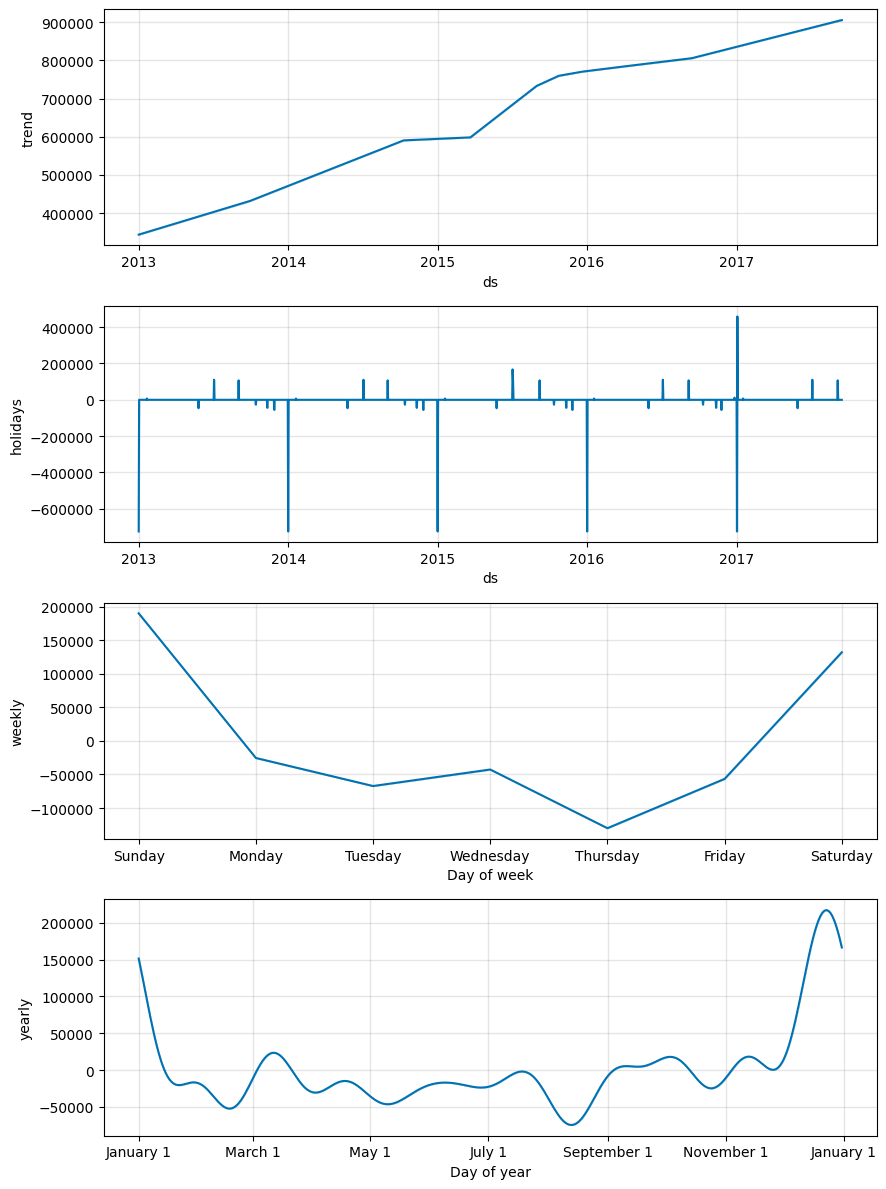

In [115]:
fig = model.plot_components(forecast)

plt.show()

In [116]:
daily_sales = train.groupby('date')['sales'].sum().reset_index()


In [117]:
oil = pd.read_csv(r"D:\IMARTICUS\Python\ML_EXAM\WBeyond_Internship\store_forecasting_data\oil.csv")

In [118]:
oil['date'] = pd.to_datetime(oil['date'])
oil = oil.rename(columns={'dcoilwtico': 'oil_price'})
oil['oil_price'] = oil['oil_price'].fillna(method='ffill').fillna(method='bfill')

C:\Users\kaush\AppData\Local\Temp\ipykernel_17884\3192180440.py:3: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [119]:
prophet_data = daily_sales.rename(columns={'date': 'ds', 'sales': 'y'})
prophet_data['day_of_week'] = prophet_data['ds'].dt.dayofweek
prophet_data['month'] = prophet_data['ds'].dt.month
prophet_data['quarter'] = prophet_data['ds'].dt.quarter

In [120]:
prophet_data = prophet_data.merge(oil[['date', 'oil_price']], left_on='ds', right_on='date', how='left')


In [121]:
prophet_data['oil_price'] = prophet_data['oil_price'].fillna(prophet_data['oil_price'].mean())


In [122]:
model = Prophet(yearly_seasonality=20, weekly_seasonality=True,
    daily_seasonality=False, changepoint_prior_scale=0.05,
    seasonality_prior_scale=10, holidays_prior_scale=10,
    changepoint_range=0.95, interval_width=0.95)

model.add_country_holidays(country_name='US')

model.add_seasonality(name='quarterly', period=91.25, fourier_order=5)

model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

model.add_regressor('oil_price', mode='multiplicative')

model.fit(prophet_data)

01:45:04 - cmdstanpy - INFO - Chain [1] start processing
01:45:04 - cmdstanpy - INFO - Chain [1] done processing


In [123]:
future_dates = model.make_future_dataframe(periods=60)
future_dates['oil_price'] = prophet_data['oil_price'].iloc[-1]
forecast = model.predict(future_dates)

In [124]:
#Forecast Visualisation

fig = make_subplots(rows=3, cols=1, subplot_titles=('Forecast', 'Trend', 'Seasonalities'))

fig.add_trace(go.Scatter(x=prophet_data['ds'], y=prophet_data['y'],
               name='Actual', mode='markers', marker=dict(color='blue', size=2)), row=1, col=1)

fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'],
               name='Forecast', line=dict(color='red')), row=1, col=1)

fig.add_trace(go.Scatter(x=forecast['ds'].tolist() + forecast['ds'].tolist()[::-1],
               y=forecast['yhat_upper'].tolist() + forecast['yhat_lower'].tolist()[::-1],
               fill='toself', fillcolor='rgba(255,0,0,0.2)', line=dict(color='rgba(255,0,0,0)'),
               name='Prediction Interval'), row=1, col=1)

fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['trend'],
               name='Trend', line=dict(color='green')), row=2, col=1)

fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yearly'],
               name='Yearly Seasonality', line=dict(color='purple')),row=3, col=1)

fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['weekly'],
               name='Weekly Seasonality', line=dict(color='orange')),row=3, col=1)

fig.update_layout(height=1200, title='Advanced Sales Forecast Analysis')

fig.show(renderer='iframe')

In [125]:
components = ['trend', 'yearly', 'weekly', 'quarterly', 'monthly', 'holidays', 'oil_price']
fig = make_subplots(rows=len(components), cols=1, subplot_titles=components, vertical_spacing=0.05)

for i, component in enumerate(components, 1):
    if component in forecast.columns:
        fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast[component],name=component), row=i, col=1)

fig.update_layout(height=2000, title='Forecast Components Visualizations')

fig.show(renderer='iframe')

In [126]:
#Model Performance Visualisation

metrics = pd.DataFrame({'date': prophet_data['ds'], 'actual': prophet_data['y'],
    'predicted': forecast['yhat'][:len(prophet_data)], 'error': prophet_data['y'] - forecast['yhat'][:len(prophet_data)]})


metrics['rolling_rmse'] = np.sqrt(metrics['error'].rolling(window=30).apply(lambda x: np.mean(x**2)))

metrics['rolling_mape'] = metrics['error'].abs().rolling(window=30).mean() / metrics['actual'].rolling(window=30).mean() * 100


fig = make_subplots(rows=2, cols=1, subplot_titles=('Rolling RMSE', 'Rolling MAPE'))

fig.add_trace(go.Scatter(x=metrics['date'], y=metrics['rolling_rmse'], name='Rolling RMSE'), row=1, col=1)

fig.add_trace(go.Scatter(x=metrics['date'], y=metrics['rolling_mape'], name='Rolling MAPE'), row=2, col=1)

fig.update_layout(height=800, title='Rolling Performance Metrics')

fig.show(renderer='iframe')


In [127]:
#Prophet Cross Validation

from prophet.diagnostics import cross_validation, performance_metrics

df_cv = cross_validation(model, initial='365 days', period='30 days', horizon='60 days')
df_p = performance_metrics(df_cv)

print("\nCross-validation Metrics:")
print(df_p[['horizon', 'rmse', 'mape', 'coverage']].round(2))

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                                                           | 0/43 [00:00<?, ?it/s]01:45:05 - cmdstanpy - INFO - Chain [1] start processing
01:45:05 - cmdstanpy - INFO - Chain [1] done processing
  2%|█▉                                                                                 | 1/43 [00:00<00:08,  5.00it/s]01:45:05 - cmdstanpy - INFO - Chain [1] start processing
01:45:05 - cmdstanpy - INFO - Chain [1] done processing
  5%|███▊                                                                               | 2/43 [00:00<00:08,  4.75it/s]01:45:05 - cmdstanpy - INFO - Chain [1] start processing
01:45:05 - cmdstanpy - INFO - Chain [1] done processing
  7%|█████▊                                                                             | 3/43 [00:00<00:09,  4.25it/s]01:45:05 - cmdstanpy - INFO - Chain [1] start processing
01:45:06 - cmdstanpy - I


Cross-validation Metrics:
   horizon       rmse  mape  coverage
0   6 days  131734.79  0.26      0.68
1   7 days  137674.62  0.27      0.67
2   8 days  141609.43  0.35      0.67
3   9 days  142867.04  0.25      0.65
4  10 days  144556.42  0.25      0.65
5  11 days  146097.71  0.26      0.65
6  12 days  152179.36  0.26      0.64
7  13 days  154693.48  0.27      0.63
8  14 days  164352.27  0.35      0.61
9  15 days  167422.78  0.36      0.60
10 16 days  168711.28  0.36      0.58
11 17 days  169572.23  0.36      0.58
12 18 days  169378.34  0.37      0.57
13 19 days  169246.70  0.36      0.56
14 20 days  160178.30  0.21      0.56
15 21 days  154901.78  0.21      0.58
16 22 days  151127.48  0.20      0.61
17 23 days  152112.28  0.20      0.60
18 24 days  149842.35  0.20      0.62
19 25 days  153175.55  0.20      0.63
20 26 days  160133.44  0.21      0.63
21 27 days  163869.24  0.21      0.62
22 28 days  166938.54  0.21      0.61
23 29 days  167754.01  0.20      0.62
24 30 days  168305.97  